#### На основе http://www.inp.nsk.su/~grozin/python/
#### http://www.playittodeath.ru/анализ-данных-при-помощи-python-графики-в-pandas/

# Библиотека matplotlib

Есть несколько пакетов для построения графиков. Один из наиболее популярных - `matplotlib`. Если в `jupyter notebook` выполнить специальную `ipython` команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков - тогда их можно вертеть мышкой (в случае inline графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки
<ul>
    <li>`plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси</li>
    <li>`plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.</li>
    <li>`plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$.</li>
    <li>`plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$.</li>
    <li>`plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`</li>
</ul>

Вспомогательные функции
<ul>
    <li>`plt.figure(figsize=(x, y))` — создать график размера $(x, y)$</li>
    <li>`plt.show()` — показать график.</li>
    <li>`plt.subplot(...)` — добавить подграфик</li>
    <li>`plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси</li>
    <li>`plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси</li>
    <li>`plt.title(name)` — установить имя графика</li>
    <li>`plt.xlabel(name)` — установить название горизонтальной оси</li>
    <li>`plt.ylabel(name)` — установить название вертикальной оси</li>
    <li>`plt.legend(loc=...)` — сделать легенду в позиции loc</li>
    <li>`plt.grid()` — добавить сетку на график</li>
    <li>`plt.savefig(filename)` — сохранить график в файл</li>
</ul>

http://matplotlib.org/gallery.html (англ.) — тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой:


In [4]:
import numpy.random as npr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import *
from numpy.random import randn
from pylab import *
import scipy.stats as sps
import warnings
warnings.simplefilter('ignore')


Посмотрим, что можно сделать при помощи этой библиотеки.\
Можно использовать тепловую карту, которая позволяет построить двумерную плотность распределения.

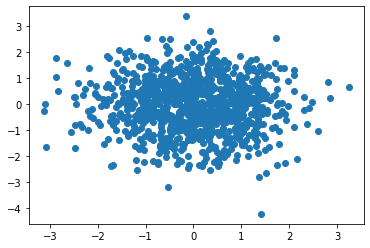

In [5]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
plot(x, y, 'o');

# Основы
Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

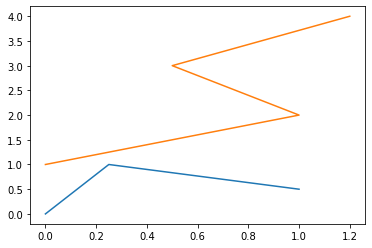

In [7]:
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.plot([0, 1, 0.5, 1.2],[1, 2, 3, 4])
plt.show()

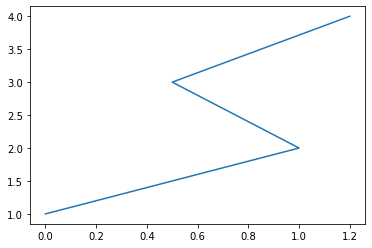

In [14]:
plt.figure()#figsize=(4, 10))
plt.plot([0, 1, 0.5, 1.2],[1, 2, 3, 4])
plt.show()

## Задание 1

Постройте график 
### $y=x^2+2x+6$
для  $x\in[-20,20]$ с шагом 0.1

используйте **NumPy**

In [5]:
#YOUR CODE HERE

`scatter` просто рисует точки, не соединяя из линиями.

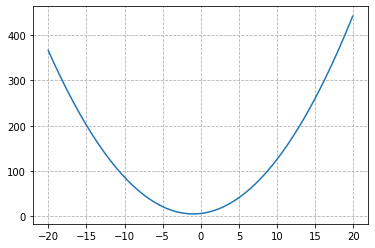

In [16]:
x = np.arange(-20, 20, 0.1)
plt.plot(x, x*x + 2*x + 6)
plt.grid(ls='--')
plt.show()

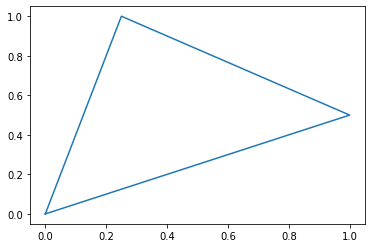

In [7]:
# plt.figure(figsize=(8,8))
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

Когда точек много, ломаная неотличима от гладкой кривой.

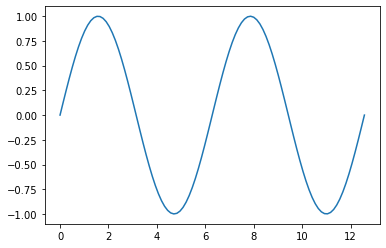

In [8]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

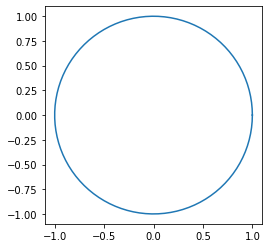

In [9]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.plot(np.cos(t), np.sin(t))
plt.axes().set_aspect(1)
plt.show()

Чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу.

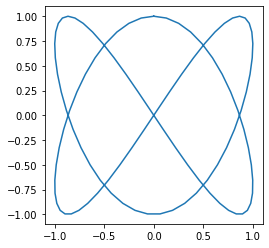

In [10]:
plt.figure()
plt.plot(np.sin(2 * t), np.cos(3 * t))
plt.axes().set_aspect(1)
plt.show()

Несколько кривых на одном графике. Каждая задаётся парой массивов - $x$ и $y$ координаты. По умолчанию, им присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить.

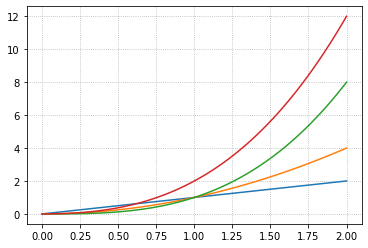

In [11]:
x = np.linspace(0, 2, 100)
plt.figure()
plt.plot(x, x, x, x**2, x, x**3)
plt.plot(x , x**2 +x**3)
plt.grid(ls=':')
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

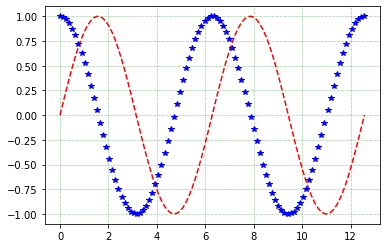

In [18]:
x = np.linspace(0, 4 * np.pi, 100)
plt.figure()
plt.grid(color='g',linestyle=':',linewidth=0.5)
plt.plot(x, np.sin(x), '--', color='red', )
plt.plot(x, np.cos(x), 'b*')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

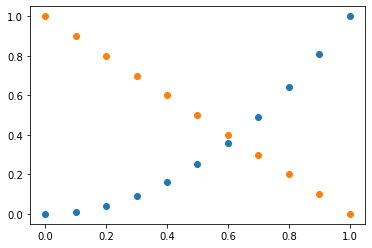

In [21]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.scatter(x, x ** 2)
plt.scatter(x, 1 - x)
plt.show()

Вот пример настройки почти всего, что можно настроить. Можно задать последовательность засечек на оси $x$ (и $y$) и подписи к ним (в них, как и в других текстах, можно использовать $\LaTeX$-овские обозначения). Задать подписи осей $x$ и $y$ и заголовок графика. Во всех текстовых элементах можно задать размер шрифта. Можно задать толщину линий и штрихи (так, на графике косинуса рисуется штрих длины 8, потом участок длины 4 не рисуется, потом участок длины 2 рисуется, потом участок длины 4 опять не рисуется, и так по циклу; поскольку толщина линии равна 2, эти короткие штрихи длины 2 фактически выглядят как точки). Можно задать подписи к кривым (legend); где разместить эти подписи тоже можно регулировать.

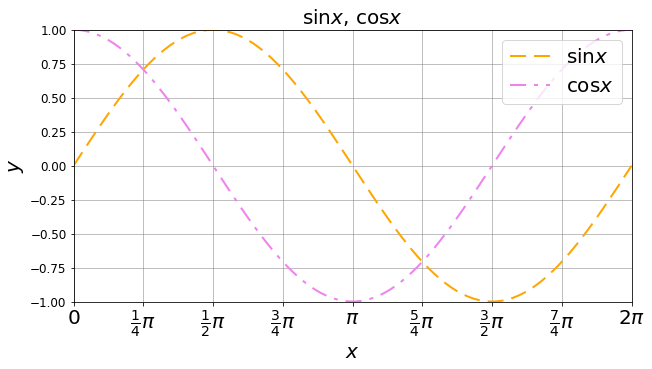

In [14]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))
plt.grid(color="grey", linestyle='-', linewidth=0.5)
plt.plot(x, np.sin(x), linewidth=2, color="orange", dashes=[8, 4], label=r'$\sin x$')
plt.plot(x, np.cos(x), linewidth=2, color="violet", dashes=[8, 4, 2, 4], label=r'$\cos x$')
plt.axis([0, 2 * np.pi, -1, 1])
plt.xticks(np.linspace(0, 2 * np.pi, 9),  # Где сделать отметки
           ('0',r'$\frac{1}{4}\pi$',r'$\frac{1}{2}\pi$',  # Как подписать
            r'$\frac{3}{4}\pi$',r'$\pi$',r'$\frac{5}{4}\pi$',
            r'$\frac{3}{2}\pi$',r'$\frac{7}{4}\pi$',r'$2\pi$'),
           fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'$\sin x$, $\cos x$', fontsize=20)
plt.legend(fontsize=20, loc='best')
plt.show()

Если `linestyle=''`, то точки не соединяются линиями. Сами точки рисуются маркерами разных типов. Тип определяется строкой из одного символа, который чем-то похож на нужный маркер. В добавок к стандартным маркерам, можно определить самодельные.

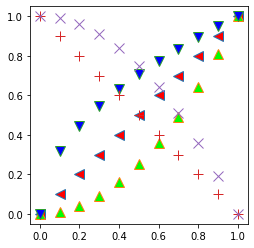

In [15]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x, linestyle='', marker='<', markersize=10, markerfacecolor='#FF0000')
plt.plot(x, x ** 2, linestyle='', marker='^', markersize=10,markerfacecolor='#00FF00')
plt.plot(x, x ** (1/2), linestyle='', marker='v', markersize=10, markerfacecolor='#0000FF')
plt.plot(x, 1 - x, linestyle='', marker='+', markersize=10, markerfacecolor='#0F0F00')
plt.plot(x, 1 - x ** 2, linestyle='', marker='x', markersize=10, markerfacecolor='#0F000F')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.axes().set_aspect(1)
plt.show()

## Логарифмический масштаб

**Вопрос:** когда удобно использовать логарифмический масштаб?

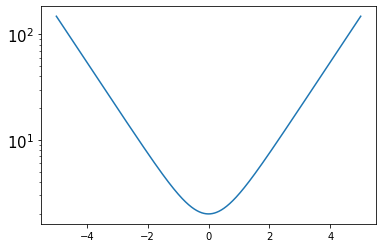

In [16]:
x = np.linspace(-5, 5, 1000)

plt.figure()
plt.plot(x, np.exp(x) + np.exp(-x))
plt.yscale('log')
plt.yticks(fontsize=15)
plt.show()

Можно задать логарифмический масштаб по обоим осям.

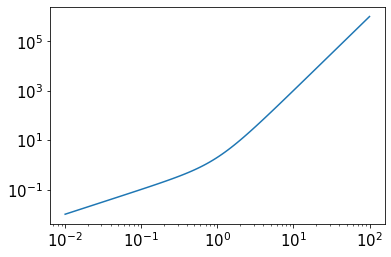

In [17]:
x = np.logspace(-2, 2, 100)

plt.figure()
plt.plot(x, x + x ** 3)
plt.xscale('log'), plt.xticks(fontsize=15)
plt.yscale('log'), plt.yticks(fontsize=15)
plt.show()

## Экпериментальные данные


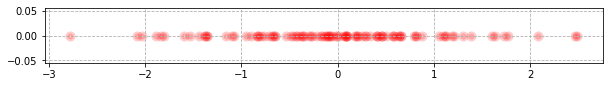

In [18]:
sample = sps.norm.rvs(size=100)

plt.figure(figsize=(10, 1))
plt.grid(ls='--')
plt.scatter(sample, np.zeros(100), alpha=0.2, color = 'r',linewidths=4)  # alpha - прозрачность точки
plt.show()

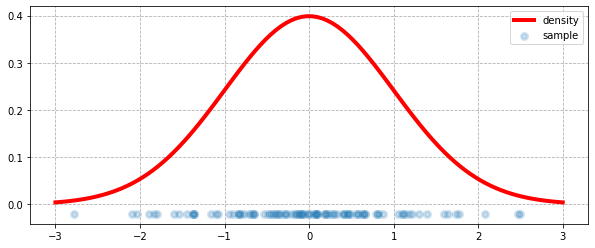

In [19]:
grid = np.linspace(-3, 3, 100)  # задаем сетку для построения графика плотности
plt.figure(figsize=(10, 4))
plt.grid(ls='--')
plt.scatter(sample, np.zeros(100) - 0.02, alpha=0.2, label='sample',linewidths=3)  # label - описание в легенде
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density', linewidth=4)  # color - цвет графика
plt.legend()  # добавляет легенду
plt.show()

Можно добавить график плотности

Нарисуем гистограмму

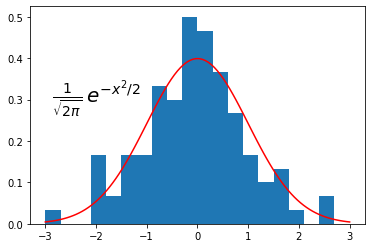

In [20]:
plt.figure()
n, bins, patches = plt.hist(sample, range=(-3, 3), bins=20, density=True)  # normed - нормированный
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')  # color - цвет графика
plt.text(-2, 0.3, r'$\frac{1}{\sqrt{2\pi}}\,e^{-x^2/2}$',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.show()

### Задание 3
Нарисуйте такую же гистограмму, только для экспоненциального распределения (подсказка: поменять sps.norm на что-то другое)

In [21]:
#YOUR CODE HERE

# ответ

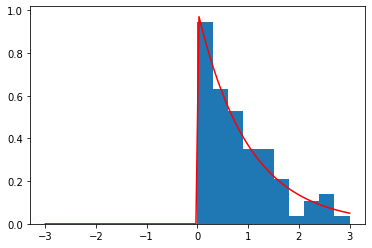

In [22]:
sample = sps.expon.rvs(size=100)
plt.figure()
n, bins, patches = plt.hist(sample, range=(-3, 3), bins=20, density=True)  # normed - нормированный
plt.plot(grid, sps.expon.pdf(grid), color='red', label='density')  # color - цвет графика
#plt.text(-2, 0.3, r'$\frac{1}{\sqrt{2\pi}}\,e^{-x^2/2}$',
 #        fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.show()

Предположим, что выборка приходит постепенно.
Для каждого момента времени посчитаем выборочное среднее и доверительный интервал.
Нанесем их на график.

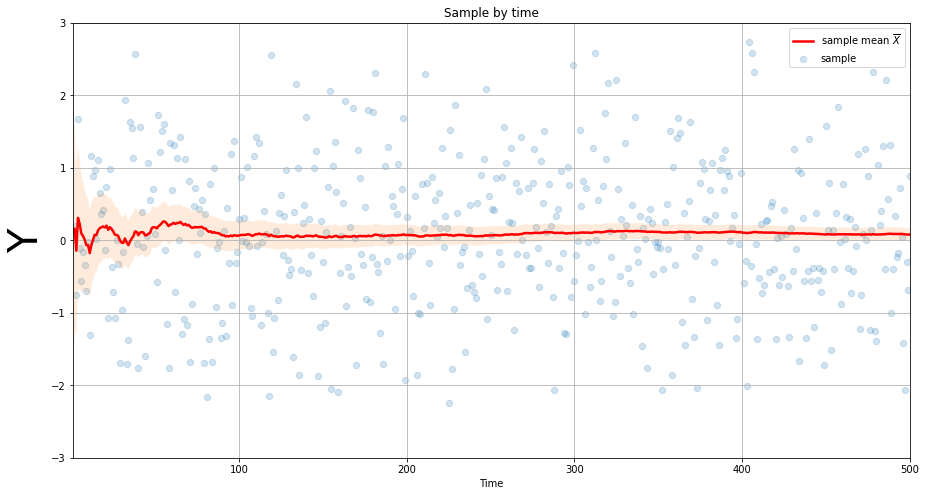

In [23]:
sample = sps.norm.rvs(size=500)

time = np.arange(1, 501)
means = sample.cumsum() / np.arange(1, 501)

plt.figure(figsize=(15, 8))
plt.scatter(time, sample, alpha=0.2, s=40, label='sample')  # s - размер точек
plt.plot(time, means, color='red', linewidth=2.5, label='sample mean $\overline{X}$')  # linewidth - толщина линии
# заполняет пространство между двумя функциями
plt.fill_between(time, means + 2 / np.sqrt(time), means - 2 / np.sqrt(time), alpha=0.15)
plt.legend()
plt.xlim((1, 500))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
plt.ylim((-3, 3))  # размеры графика по вертикальной оси 
plt.xlabel('Time')  # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Sample by time')  # имя графика
plt.ylabel('Y' , size = 40)
plt.grid()  # добавляем сетку
plt.savefig('example.png')  # сохранение в файл
plt.show()

## Двухмерные графики

In [24]:
# Создадим диапазоны
x = np.arange(-3, 5)
y = np.arange(-3, 5)
print('x range:', x)
print('y range:', y)

# Для начала, нужно создать meshgrid:
X, Y = np.meshgrid(x, y)

print('\nX grid: \n', X)
print('\nY grid: \n', Y)

x range: [-3 -2 -1  0  1  2  3  4]
y range: [-3 -2 -1  0  1  2  3  4]

X grid: 
 [[-3 -2 -1  0  1  2  3  4]
 [-3 -2 -1  0  1  2  3  4]
 [-3 -2 -1  0  1  2  3  4]
 [-3 -2 -1  0  1  2  3  4]
 [-3 -2 -1  0  1  2  3  4]
 [-3 -2 -1  0  1  2  3  4]
 [-3 -2 -1  0  1  2  3  4]
 [-3 -2 -1  0  1  2  3  4]]

Y grid: 
 [[-3 -3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4]]


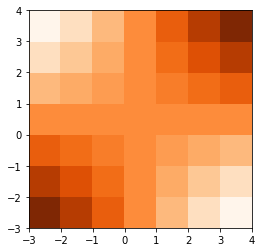

In [25]:
# Нужна какая-то функция. Пусть будет:
Z = X * Y

plt.figure(figsize=(4, 4))
plt.pcolormesh(X, Y, Z, cmap='Oranges')  # закрасить с интенсивностью density, cmap - цветовая схема

plt.show()

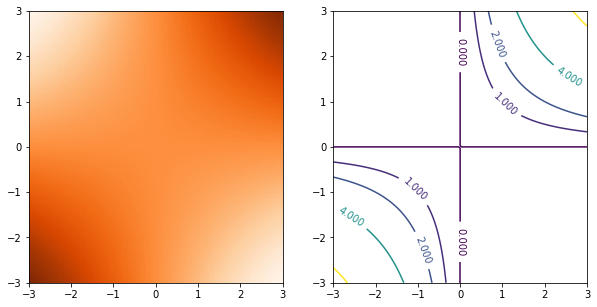

In [26]:
# Сделаем сетку поточнее
X, Y = np.meshgrid(
    np.linspace(-3, 3, 100),
    np.linspace(-3, 3, 100)
)

Z = X * Y

# И нарисуем сразу два графика одной картинкой:
plt.figure(figsize=(10, 5))
# Первый:
plt.subplot(1, 2, 1)
plt.pcolormesh(X, Y, Z, cmap='Oranges')  # закрасить с интенсивностью density, cmap - цветовая схема
# И второй
plt.subplot(1, 2, 2)
_contours = plt.contour(X, Y, Z, [0, 1, 2, 4, 8])  # нарисовать указанные линии уровня
plt.clabel(_contours, fontsize=10, inline=1, fmt='%1.3f')

plt.show()

## Images (пиксельные картинки)

Картинка задаётся массивом `z`: `z[i,j]` - это цвет пикселя `i,j`, массив из 3 элементов (`rgb`, числа от 0 до 1).

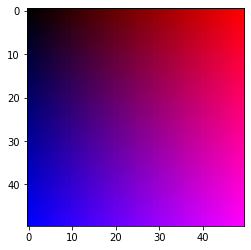

In [27]:
size = 50
x, y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))

z = np.zeros((size, size, 3))
z[:, :, 0] = x
z[:, :, 2] = y

plt.figure()
plt.imshow(z)
plt.show()

Загрузим картинку из сети.

In [34]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://avatars.mds.yandex.net/get-zen_doc/965902/pub_5f63f5e3174f9a0e6dec4c0b_5f63f60435960479b9a9a4fd/scale_1200'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

img = np.array(img)

Код загрузки изображения сейчас не представляет большого интереса.  
Главное - получить изображение в формате numpy:

In [35]:
img.shape

(394, 700, 3)

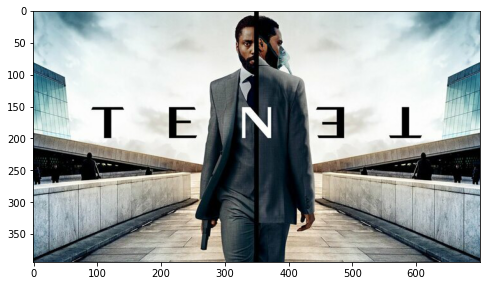

In [36]:
plt.figure(figsize=(8,10))
plt.imshow(img);

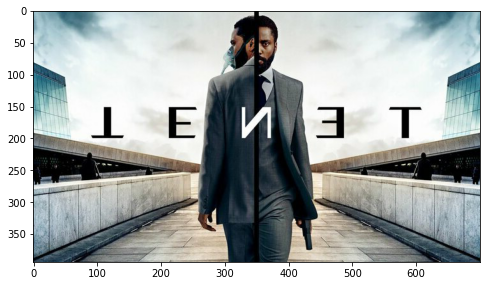

In [37]:
img2 = img[:, ::-1]

plt.figure(figsize=(8,10))
plt.imshow(img2);

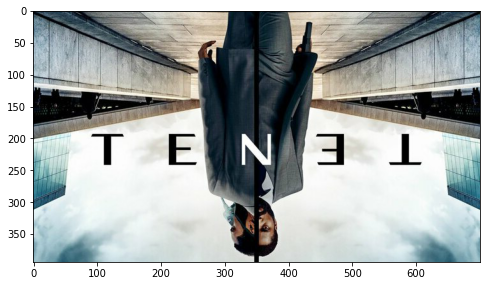

In [38]:
img2 = img[::-1, :]
img2 = img2[:, ::-1]
plt.figure(figsize=(8,10))
plt.imshow(img2);

## Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [39]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)

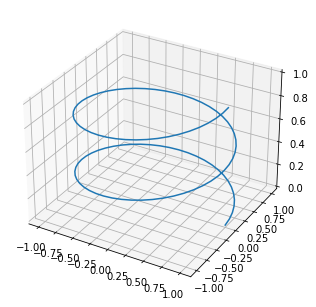

In [40]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z)
plt.show()

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой (это можно делать с трёхмерными картинками в отдельных окнах). Но можно задать, с какой стороны мы смотрим.

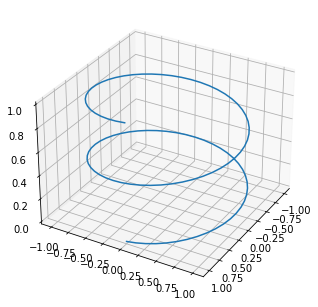

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
ax.elev, ax.azim = 30, 30
ax.plot(x, y, z)
plt.show()

## Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

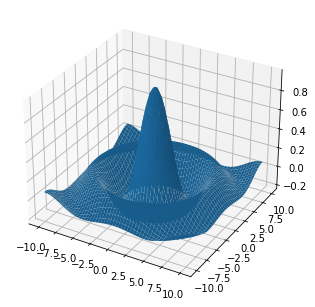

In [42]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1)
plt.show()

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

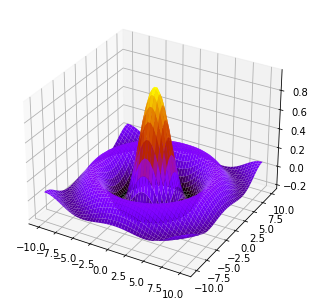

In [43]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.show()

## Задача 4
постройте **тор**: 
### $x = (1 + r \cdot cos(\vartheta\varphi)) \cdot cos(\vartheta\varphi)$, 
### $y = (1 + r \cdot cos(\vartheta\varphi)) \cdot sin(\vartheta\varphi)$
### $z = r \cdot sin(\vartheta\varphi)$
т.н. **параметрическую** поверхность с параметрами $\vartheta$ $\varphi$.
Раскрасьте ее по своему усмотрению.

установите 
**ax.elev = 50**

**ax.set_aspect(0.3)**

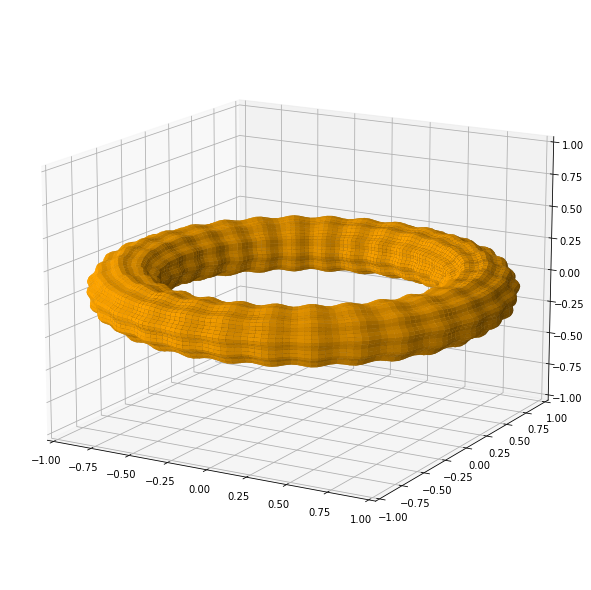

In [44]:
# создаем сетку
th, ph = np.meshgrid(
    np.linspace(0, 2 * np.pi, 200),
    np.linspace(0, 2 * np.pi, 100)
)

# создаем тор
r_big = 1
r_small = 0.2 + 0.01 * np.sin(ph*10) + 0.01 * np.sin(th*30)
x = (r_big + r_small * np.cos(ph)) * np.cos(th)
y = (r_big + r_small * np.cos(ph)) * np.sin(th)
z = r_small * np.sin(ph)

# рисуем график
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.elev = 15
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(x, y, z, rstride=2, cstride=1, color='orange')
plt.show()

### Обратная связь:
https://docs.google.com/forms/d/e/1FAIpQLSf7hjfzR5U_DKTrKYjUTAXgp77VHOw9_02Qo4IXPzJ1poM5Zw/viewform

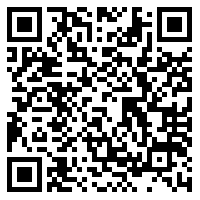